### Visualizations

In [2]:
import pandas as pd 

df = pd.read_csv('../data/data_for_plotly_map.csv')
df
df['code'] = ['CA', 'CO', 'FL', 'UT', 'AL', 'MS', 'NY', 'OR', 'VT', 'VA']
df

,Unnamed: 0,State,Decision,avg_workexp,avg_volunteer,avg_test,avg_writing,avg_gpa,total_apps,code
0,1,California,Admit,3.11,2.56,946.44,94.44,3.76,12,CA
1,2,Colorado,Admit,1.57,2,967.38,82.38,3.72,18,CO
2,3,Florida,Admit,1.59,2.18,966.18,87.18,3.73,35,FL
3,4,Utah,Admit,1.2,2,968,87,3.78,6,UT
4,5,Alabama,Waitlist,No Admitted Students,No Admitted Students,No Admitted Students,No Admitted Students,No Admitted Students,1,AL
5,6,Mississippi,Decline,No Admitted Students,No Admitted Students,No Admitted Students,No Admitted Students,No Admitted Students,1,MS
6,7,New York,Waitlist,No Admitted Students,No Admitted Students,No Admitted Students,No Admitted Students,No Admitted Students,1,NY
7,8,Oregon,Decline,No Admitted Students,No Admitted Students,No Admitted Students,No Admitted Students,No Admitted Students,1,OR
8,9,Vermont,Waitlist,No Admitted Students,No Admitted Students,No Admitted Students,No Admitted Students,No Admitted Students,1,VT
9,10,Virginia,Decline,No Admitted Students,No Admitted Students,No Admitted Students,No Admitted Students,No Admitted Students,4,VA


### Cloropleth Map - Applicant Breakdown

In [47]:
import plotly.graph_objects as go

# convert to string
for col in df.columns:
    df[col] = df[col].astype(str)

# hover text
df['text'] = df['State'] + ' Total Applicants: ' + df['total_apps'] + '<br>' + \
    '<br>' + 'ADMITTED STUDENT AVERAGES: ' + '<br>' +\
    'GPA: ' + df['avg_gpa'] + '<br>' +\
    'Work Exp: ' + df['avg_workexp'] + '<br>' + \
    'Volunteer: ' + df['avg_volunteer'] + '<br>' +\
    'Test Score: ' + df['avg_test'] + '<br>' + \
    'Writing Score: ' + df['avg_writing']

fig = go.Figure(data=go.Choropleth(
    locations=df['code'],
    z=df['total_apps'].astype(float),
    locationmode='USA-states',
    colorscale='Reds',
    autocolorscale=False,
    text=df['text'], # hover text
    marker_line_color='white', # line markers between states
    colorbar_title="Total Applicants",
    colorbar_title_font_color = "#fb6502",
    colorbar_title_font_size = 14
))

# Formatting for title, land color, lakes etc
fig.update_layout(
    title_text='University of Florida Applicant Breakdown by State',
    title_font_color="#00529b",
    font = dict(
        size = 16),
    geo = dict(
        scope='usa',
        projection=go.layout.geo.Projection(type = 'albers usa'),
        showlakes=True, # lakes
        landcolor='#EEEEEE',
        bgcolor= '#fcfcfc',
        lakecolor='rgb(255, 255, 255)')
)

fig.update_layout(paper_bgcolor="#fcfcfc")

# Formatting for hover 
fig.update_layout(
hoverlabel=dict(
    font_color="white",
    bgcolor="#4d64c0"
))

fig.show()

# export plotly 
fig.write_html("../output/map_breakdown_by_state_plotly.html")

### Scatterplot

Noticed that among all admitted students, applicants from California have to perform at a higher level. 

- average work experience 
- avergae volunteering 
- avergae writing 

![alttext](../output/avgs_table.png 'hi') 

![alttext](../output/state_avgs_table1.png 'hi') 

In [26]:
import numpy as np

data = pd.read_csv('../data/cleaned.csv')
data['Admitted'] = np.where(data['Decision'] == 'Admit', 'Admitted', 'Not Admitted')
data['Admitted'] = data['Admitted'].astype('category')
data

,Unnamed: 0,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel,Admitted
0,0,Admit,California,3.90,6.7,962.0,100,1.0,0,Admitted
1,1,Admit,Florida,3.80,1.4,969.0,97,1.0,4,Admitted
2,3,Admit,Colorado,3.60,0.9,969.0,97,0.0,2,Admitted
3,6,Admit,California,3.88,1.5,967.0,95,1.0,5,Admitted
4,7,Admit,California,3.70,1.2,969.0,94,1.0,2,Admitted
...,...,...,...,...,...,...,...,...,...,...
75,83,Waitlist,Vermont,3.53,3.3,862.0,85,1.0,1,Not Admitted
76,84,Waitlist,Florida,3.52,0.7,868.0,81,0.0,4,Not Admitted
77,85,Waitlist,Florida,3.51,3.4,865.0,88,1.0,3,Not Admitted
78,86,Waitlist,California,3.47,2.2,867.0,77,1.0,5,Not Admitted


In [108]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

# sns.scatterplot(x='WorkExp', y='WritingScore', hue='Admitted', data=data)
# plt.show()

fig = px.scatter( data, x='WorkExp', y='WritingScore', color='Admitted', size='VolunteerLevel', 
                color_discrete_map= {'Admitted': '#005496',
                                      'Not Admitted': '#f37021'}, 
                labels=dict({'WritingScore': 'Writing Score',
                             'WorkExp': 'Work Experience (years)',
                             'Admitted': 'Decision'}))

fig.update_layout({
    'plot_bgcolor' : '#fcfcfc', 
    'paper_bgcolor': '#fcfcfc'
})

fig.update_layout(
title_text='Relationships Between Quantitative and Qualitative Metrics',title_x=0.5)

fig.update_layout(
    font_family="PT Sans Narrow",
    title_font_family = "PT Sans Narrow",
    font_color="black",
    font_size = 16
    # title_font_color="orange",
    # legend_title_font_color="gray"
)

# add averages of accepted students 
fig.add_vline(x=2.04, line_dash='dot', line_color = 'lightgrey',annotation_text=" Average: 2.04", 
              annotation_font_size=8, annotation_position="bottom right",
              annotation_font_color="grey")
fig.add_hline(y=88.1,  line_dash='dot', line_color = 'lightgrey',annotation_text="  Average: 88.1", 
              annotation_font_size=8, annotation_position="bottom right",
              annotation_font_color="grey")

fig.show()
#'dot', 'dash', 'longdash', 'dashdot'
fig.write_html("../output/workexp_writing.html")


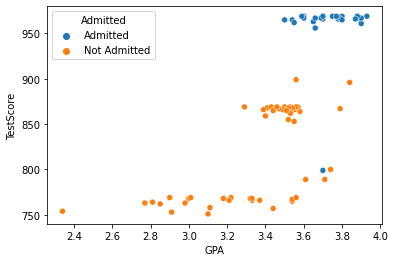

In [56]:
# CA and not CA 
data['CA'] = np.where(data['State'] == 'California', 'CA', 'Other')
data['CA'] = data['CA'].astype('category')

# plot variables 
sns.scatterplot(x='GPA', y='TestScore', hue='Admitted', data=data)
plt.show()




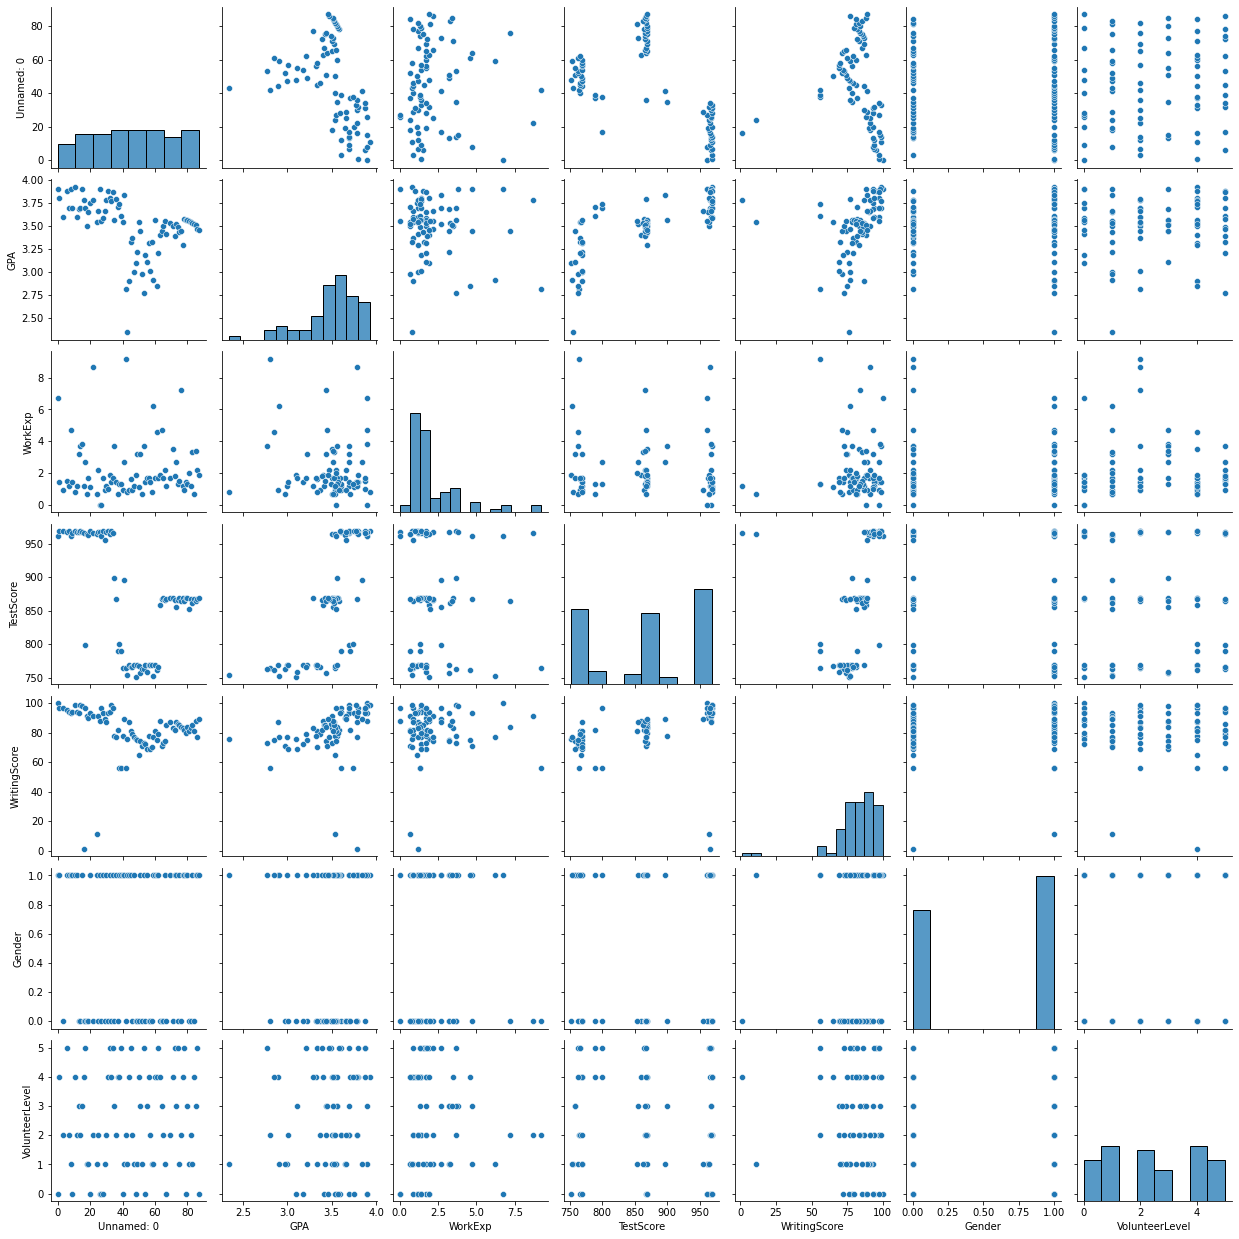

In [59]:
data.corr()
sns.pairplot(data, kind="scatter")
plt.show()

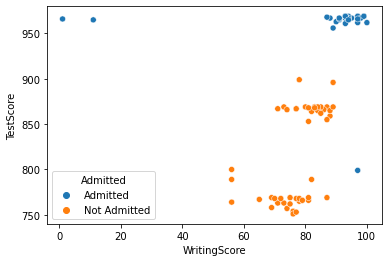

In [58]:
# plot variables 
sns.scatterplot(x='WritingScore', y='TestScore', hue='Admitted', data=data)
plt.show()
